In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit

### 1) Business Problem

Because acquiring new customers is more expensive than keeping existing ones, it is vital for banks or any business to identify unsatisfied consumers who may decide to stop using the bank's services and switch to a competitor. Bank decision-makers could reduce churn rates and increase customer loyalty by spotting clients who are likely to leave. This could be done by engaging with those customers who are likely to be churned to give them rewards, make surveys to understand customers' expectations on the service and meet those expectations and offer them customized services based on their behavior. This machine learning project intends to establish a churn predictive model by constructing classification models on historical bank customer data, which will assist bank decision-makers in early detecting clients with a high likelihood of churning and formulating effective strategies to keep those clients.

This dataset was found on Kaggle, an open-source site to download databases to help with machine learning projects. It includes columns that all banks have on their customers which makes it perfect for this project.

### 2) Importing the Dataset

In [6]:
#Import bank customres churn dataset 
df=pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Drop irrelivent columns with no use to the analysis
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


After removing some columns that add no value to the project (RowNumber, CustomerID & Surname) we are left with the following:

**Target Variable**\
•**Exited**: did the customer leave the bank?

**Predictors**\
•**CreditScore**: customers credit score\
•**Geography**: country customer lives in\
•**Gender**: Male of Female\
•**Age**\
•**Tenure**: how long has the customer been with the bank?\
•**Balance**: how much money is in their account?\
•**NumOfProducts**: number of products the customer has purchased through the bank\
•**HasCrCard**: does the customer have a credit card?\
•**IsActiveMember**: do they use their account often?\
•**EstimatedSalary**: banks judgment on their annual salary\

### 3) Descriptive Statistics on the Dataset

In [10]:
#Check the size and shape of the dataset
print(f'The dataset is made up of {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset is made up of 10000 rows and 11 columns.


In [11]:
#Display some information on the variables within the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
#Display some initial descriptive statistics
round(df.describe(),3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.248,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


Text(0.5, 1.0, 'Only 25.58% of Customers in the Dataset Exited')

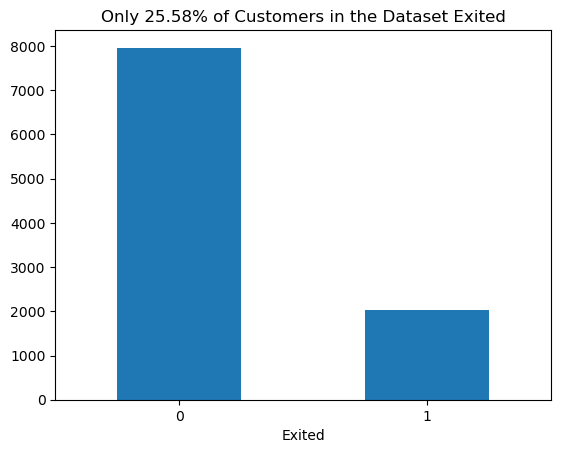

In [13]:
#Look at the level of churn within the dataset
exit_plot = df.Exited.value_counts().plot.bar(rot=0)
a = df.Exited.value_counts()[0]
b = df.Exited.value_counts()[1]
exit_plot.set_title(f'Only {round((b/a)*100,2)}% of Customers in the Dataset Exited')

Please take a moment to look over the basic descriptive statitics of the dataset above. These are purely descriptive and in no way aim to 'explore' the data as would be innapropriate before splitting into train and test segments. 

The main thing to take away here is that 25.58% of the instances were those of a customer who churned from the bank, this is important to note as it influences how to apply stratified sampling in the next stage. 

The average tenure with the bank is just over five years and the average age is just under 40. Over 70% of the dataset has a credit card with the bank and just over half are defined as an active memeber. The mean estimated salary for the dataset is over €100,000 which is quite high, the standard deviation here is high too indicating high veriability.

### 4) Split the Data into Trainset and Testset

#### Random Sampling

In [17]:
#Split into test and train via random sampling
random_train_set, random_test_set = train_test_split(df, test_size = 0.2, random_state = 7)
print(f'There are {random_train_set.shape[0]} training instances and {random_test_set.shape[0]} testing instances')

There are 8000 training instances and 2000 testing instances


In [18]:
#Examine if our target variable is evenly distributed via the use of random sampling
exit_train = random_train_set['Exited'].value_counts()[1]/random_train_set['Exited'].value_counts()[0]*100
exit_test = random_test_set['Exited'].value_counts()[1]/random_test_set['Exited'].value_counts()[0]*100
print(f' The level of churn in the training data is {round(exit_train,2)}% and in the\
test data it is {round(exit_test,2)}%')

 The level of churn in the training data is 25.51% and in thetest data it is 25.87%


#### Stratified Sampling

In [20]:
#Use stratified split to try get a more representative train/test churn split
stratified_splitter=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)
train_index ,test_index=list(stratified_splitter.split(df ,df["Exited"]))[0]
train_set=df.loc[train_index]
test_set=df.loc[test_index]

In [21]:
def Exited_cat_proportions(data):
    return data["Exited"].value_counts() / len(df)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": Exited_cat_proportions(df),
    "Random test set": Exited_cat_proportions(random_test_set),
    "Stratified test set": Exited_cat_proportions(test_set),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = df_tmp["Random test set"] / df_tmp["Overall"]
df_tmp["Strat. %error"] = df_tmp["Stratified test set"] / df_tmp["Overall"]

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
Exited,,,,,
0,0.7963,0.1589,0.1593,0.199548,0.200050
1,0.2037,0.0411,0.0407,0.201767,0.199804


In [22]:
#What method of sampling generated the best results?
r_error = df_tmp['Rand. %error'].sum() 
s_error = df_tmp['Strat. %error'].sum()
print(f'The error in random sampling is {round(r_error,4)} and the error in \
stratified sampling is {round(s_error,4)}')

The error in random sampling is 0.4013 and the error in stratified sampling is 0.3999


In [23]:
exit_train_s = train_set['Exited'].value_counts()[1]/train_set['Exited'].value_counts()[0]*100
exit_test_s = test_set['Exited'].value_counts()[1]/test_set['Exited'].value_counts()[0]*100
print(f'The level of churn in our new stratified train data is {round(exit_train_s,2)}% and in our test data\
 is now {round(exit_test_s,2)}% which is marginally closer than with random sampling.')

The level of churn in our new stratified train data is 25.59% and in our test data is now 25.55% which is marginally closer than with random sampling.


The code above details our sampling methods for this study. 

Firt we used random sampling which gave us 25.51% of churn in the training data compared to 25.87% in the whole dataset. This is a pretty good result from random sampling, however to make sure our modelling is as acvcurate as possible, it is always best to attempt to make our training data as representative as possible. 

Therefore we went on to also do stratified sampling using the level of churn as our important variable to minimuse the difference in. Here we were able to get a level of churn equal to 25.59% in our training data and 25.55% in our testing data. 

We then went on to run some analysis comparing the two approaches and found that the error was slightly less with the stratified sampling approach. We have therefore chosen this data split to go ahead with and begin our exploratory analysis. 

### 5) Data Exploration

Text(0.5, 1.0, 'Most Customers in the Dataset are from France\nGermans seem more likely to churn')

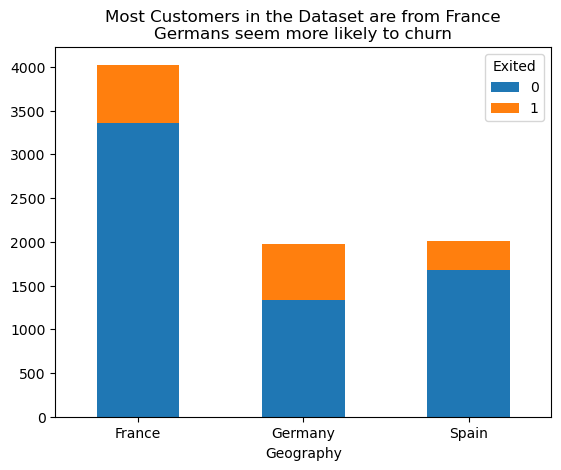

In [26]:
#Showcase the geographical data on customers
geog_churn = pd.crosstab(train_set['Geography'], train_set['Exited'])
geog_churn_plot = geog_churn.plot.bar(stacked=True,rot=0)
geog_churn_plot.set_title('Most Customers in the Dataset are from France\nGermans seem more likely to churn')

To begin our exploration, we can see that most of the training data is from France and it seems that there is some difference in churn across the three countries; It looks like more German customers churn than French and Spanish.

Text(0.5, 1.0, 'Gender Frequencies are Relitivly Even within the Dataset\nFemales leave slightly more')

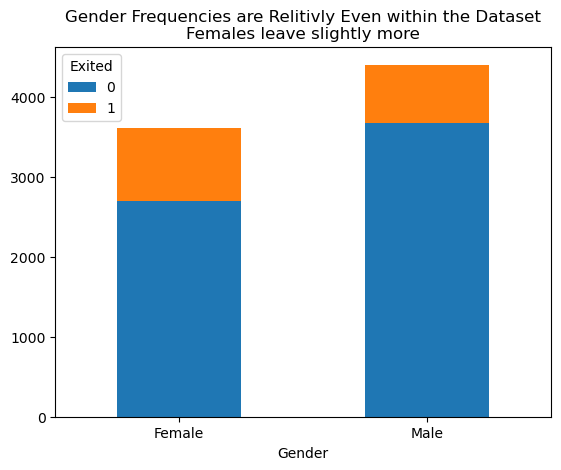

In [28]:
#Explore gender frequencies within the dataset
gender_churn = pd.crosstab(train_set['Gender'], train_set['Exited'])
gender_churn_plot = gender_churn.plot.bar(stacked=True,rot=0)
gender_churn_plot.set_title('Gender Frequencies are Relitivly Even within the Dataset\nFemales leave slightly more')

Here we can see that there are slightly more males within the training data. Females seem to churn slightly more than males, however there isn't a huge amount of variation in churn rate between the two.

Text(0.5, 1.0, 'The Large Majority of Cutomers in the Dataset have a Credit Card\nNot too much variation in level of churn')

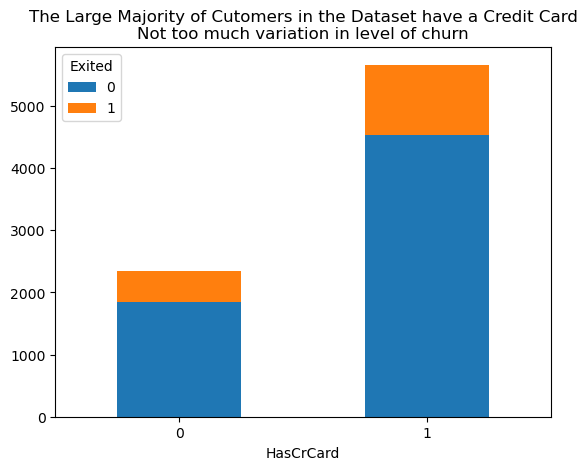

In [30]:
#Explore the level of customers in the dataset who own a credit card
card_churn = pd.crosstab(train_set['HasCrCard'], train_set['Exited'])
card_churn_plot = card_churn.plot.bar(stacked=True,rot=0)
card_churn_plot.set_title('The Large Majority of Cutomers in the Dataset have a Credit Card\nNot too much variation\
 in level of churn')

The majority of customers in the training data have a credit card with the bank. It doesn't seem to have the effect on churn as we might have thought. If anything it looks like those with a credit card leave slightly more than those without one.

Text(0.5, 1.0, 'The dataset is Evenly Split Between Active & Non-active Members \nLess likely to churn if active member')

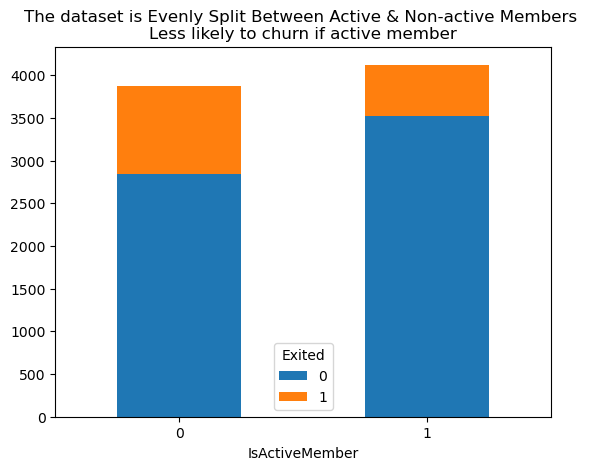

In [32]:
#look at the frequencies of active and non-active members in the dataset
active_churn_table = pd.crosstab(train_set['IsActiveMember'],train_set['Exited'])
active_churn_plot = active_churn_table.plot.bar(stacked=True, rot=0)
active_churn_plot.set_title('The dataset is Evenly Split Between Active & Non-active Members \n\
Less likely to churn if active member')

The training data is split relitively evenly between active and non-active members. As you would expect non-active members seem to churn slightly more than active customers.

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'EstimatedSalary'}>]], dtype=object)

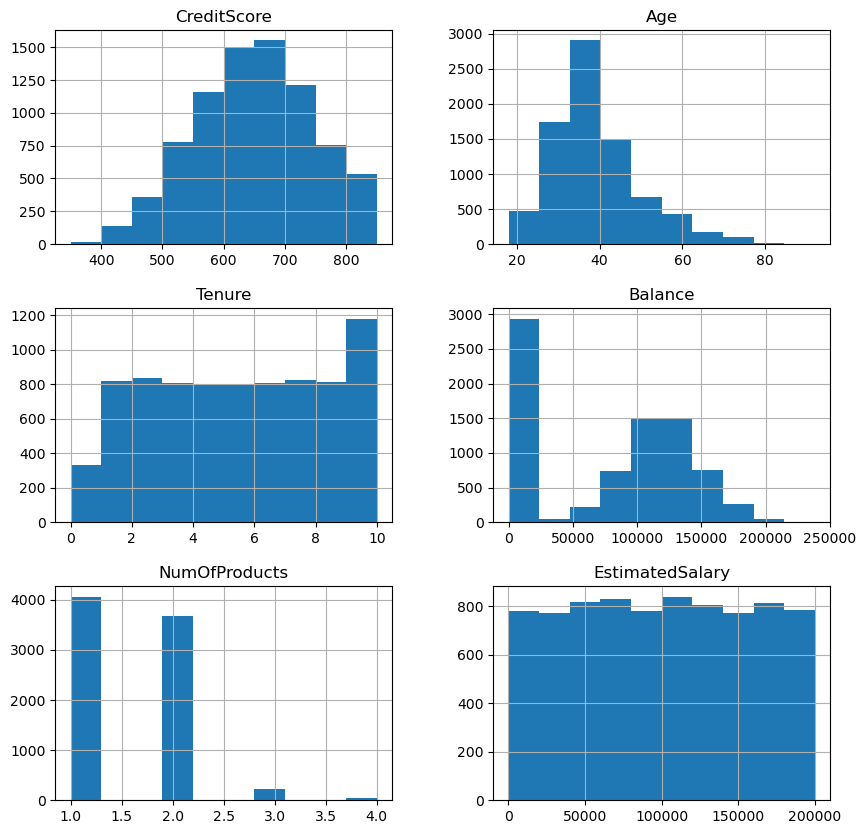

In [34]:
train_set[['CreditScore','Age','Tenure','Balance',\
         'NumOfProducts','EstimatedSalary']].hist(bins=10, figsize=(10,10))

The above matrix of histograms shows us more-or-less what we want to see across most of our continuous fields.

CreditScore, Age, Tenure & EstimatedSalary all appear normally distributed. Age is skewed slightly to the right, and tenure slightly to the left.

There is a slight issue with the Balance field. As there are two groups of customers, ones with money in the bank, and ones without any, it means there is a normally distributed group in the middle, and then a cluster of customers at 0. We cannot just ignore these customers as it's about half of our dataset, and those with no money in the bank might be more likely to churn. Instead we will leave it as it is and enginieer a new variable later on.

In [36]:
#Here's the Pearson's R score, useful to know, but only measures linear relationships!
# Select only numeric columns
numeric_cols = train_set.select_dtypes(include=[np.number])

# Calculate correlation matrix
cor_matrix = numeric_cols.corr()

# Sort correlations with 'Exited'
cor_matrix['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.283000
Balance            0.118719
EstimatedSalary    0.014987
Tenure            -0.009943
HasCrCard         -0.010808
CreditScore       -0.025217
NumOfProducts     -0.049742
IsActiveMember    -0.150441
Name: Exited, dtype: float64

In the correlation matrix above you can see that Age and Balance are the strongest positive association to churn. This means the older a customer (and the more money they have in the bank) the more likely they are to churn. On the other hand if the customer is an active member then they are less likely to churn.

It must be said that there aren't any strong relationships, all of these are weak, however they might have some predictive power when all combined in the models to come.

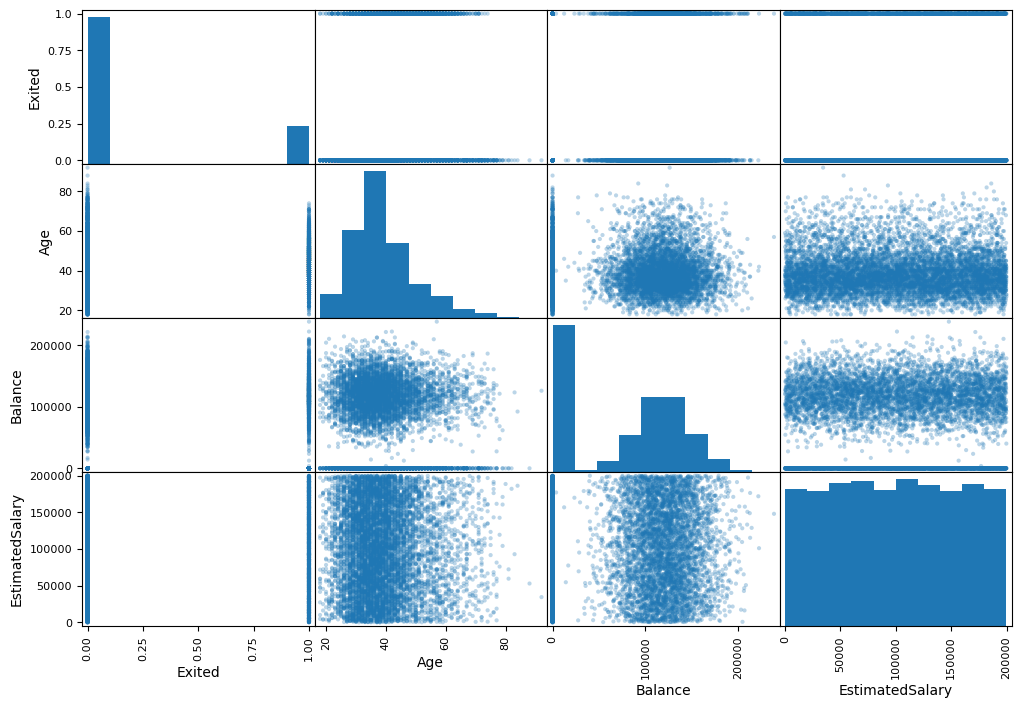

In [38]:
#Scatter Matrix (check for multicolinearity)
from pandas.plotting import scatter_matrix
attributes = ['Exited', 'Age', 'Balance', 'EstimatedSalary']
scat_matrix = scatter_matrix(train_set[attributes], figsize=(12,8), alpha=0.3)

The above is another correlation matrix, here showing how our predictors are related to eachother. This is good news as it shows no strong relationships that would indicate multicoliniarity and we therefore don't need to remove any columns.

### 6) Data Preprocessing

#### Missing Values

In [42]:
#Check for missing values
null_train = train_set.isnull().sum()
null_test = test_set.isnull().sum()
print(f'The training data has {null_train.sum()} missing values and the test data has {null_test.sum()} \
missing data.')

The training data has 0 missing values and the test data has 0 missing data.


There is no missing data within our dataset which meant we didn't need to worry about imputating or removing missing values.

#### Feature Engineering

In [45]:
#Convert Gender variable to take binary variables only: Male=1 & Female=0
#Firt create a function that converts a gender variable (string) into a binary variable
def gender_binary (df):
    if df['Gender'] == 'Male':
        df['Gender'] = 1
    else:
        df['Gender'] = 0
    return df

#Now use the apply() function to fit this to first the train_set and then the test_set
train_set = train_set.apply(gender_binary, axis=1)
test_set = test_set.apply(gender_binary, axis=1)

#Now check that the function worked as intended
train_set['Gender'].value_counts()

Gender
1    4398
0    3602
Name: count, dtype: int64

In [46]:
#Now we need to convert the Geography variable into two seperate dummy variables taking binary values

one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

#The encoder can only take a 2-d numpy array so we need to convert it as such
cat_vals = train_set['Geography'].values.reshape(-1,1)

#Now we need to fit and transform the trainset
transformed = one_hot_encoder.fit_transform(cat_vals)

#Now we must convert these values back into a dataframe and return to a column in our train_set
col_names = one_hot_encoder.categories_[0].tolist()[1:]
for i, col_name in enumerate(col_names):
    train_set[col_name] = transformed[:,i]

#Test to see it worked as intended
train_set.head()

C:\Users\br1gi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
7378,599,France,1,34,8,0.00,2,1,1,174196.68,0,0.0,0.0
2489,714,France,1,28,6,122724.37,1,1,1,67057.27,0,0.0,0.0
3843,783,Spain,1,38,1,0.00,3,1,1,80178.54,1,0.0,1.0
4560,624,Spain,0,36,0,0.00,2,1,0,111605.90,0,0.0,1.0
1309,591,Spain,1,30,8,124857.69,2,0,0,50485.70,0,0.0,1.0


In [47]:
#Now we must transform the test set
cat_vals = test_set['Geography'].values.reshape(-1,1)
transformed = one_hot_encoder.transform(cat_vals)
for i, col_name in enumerate(col_names):
    test_set[col_name] = transformed[:,i]
    
#Test to see it worked as intended
test_set.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
2239,493,France,0,31,3,0.00,1,1,1,176570.28,1,0.0,0.0
1502,796,Germany,1,39,5,86350.87,2,0,0,105080.53,0,1.0,0.0
2221,767,Germany,0,35,6,132253.22,1,1,0,115566.57,1,1.0,0.0
6593,655,Germany,0,30,1,83173.98,2,1,1,184259.60,0,1.0,0.0
9666,758,Spain,1,35,5,0.00,2,1,0,95009.60,0,0.0,1.0


In [48]:
#Drop the original geography variable from the train/test data
train_set.drop('Geography', axis=1, inplace=True)
test_set.drop('Geography', axis=1, inplace=True)
train_set.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
7378,599,1,34,8,0.00,2,1,1,174196.68,0,0.0,0.0
2489,714,1,28,6,122724.37,1,1,1,67057.27,0,0.0,0.0
3843,783,1,38,1,0.00,3,1,1,80178.54,1,0.0,1.0
4560,624,0,36,0,0.00,2,1,0,111605.90,0,0.0,1.0
1309,591,1,30,8,124857.69,2,0,0,50485.70,0,0.0,1.0


In [49]:
#Now we need to create
#Firt create a function that 
def new_feature_zb (df):
    if df['Balance'] == 0:
        df['ZeroBalance'] = 1
    else:
        df['ZeroBalance'] = 0
    return df

#Now use the apply() function to fit this to first the train_set and then the test_set
train_set = train_set.apply(new_feature_zb, axis=1)
test_set = test_set.apply(new_feature_zb, axis=1)

#Now check that the function worked as intended
test_set['ZeroBalance'].value_counts()

ZeroBalance
0.0    1315
1.0     685
Name: count, dtype: int64

Our feature engineering is made up of three main parts (1) binary conversion, (2) dummy variable creation, and (3) new predictor creation. 

1) First we had to convert the gender variable to binary, this is because most machine learning algorithms can only read numerical data, and all perform better when all predictors are in the same format and scale. We therefore created a function and used the apply() method to make male instances 1 and female 0.

2) Next we needed to make dummy variables for the geography variable based on the same reasons as before. Here we use the OneHotEncoder() function. We first fit the model on our training data, and used that to transform the training data, and then the test data afterwards. We new have two new columns for Germany and Spain. If both are zero then this means the instance is a customer from France. 

3) Next we looked at how we can better the data itself, we know that there is a big difference between someone with €3 in their account and someone with €0 in their account. It's a difference of much more importance than two customers with €2,000 and €2,003 in their accounts. To showcase this imporatance to the model we have created a new variable which will take 1 if the customer has a balance of €0 and 0 if they have any value of money in their account.

#### Scaling

In [52]:
#Now we will use the standard scaler to standardise our predicor variables
scaler = StandardScaler()

#Seperate train data predictors and target
train_set_target = train_set['Exited'].values
train_set_predictors = train_set.drop('Exited', axis=1)

#Fit_transform returns a numpy array so we must put it back to a dataframe
scaled_vals = scaler.fit_transform(train_set_predictors)
train_set = pd.DataFrame(scaled_vals, columns=train_set_predictors.columns)

#Now we must pup the non-scaled target variable (Exited) back 
train_set['Exited'] = train_set_target

#Check the fit and transformation has worked as intended
train_set.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,ZeroBalance,Exited
0,-0.524454,0.904991,-0.475921,1.031255,-1.214708,0.807667,0.642401,0.969466,1.290892,-0.571962,-0.578120,1.314729,0.0
1,0.661770,0.904991,-1.048688,0.338440,0.753285,-0.913520,0.642401,0.969466,-0.576569,-0.571962,-0.578120,-0.760613,0.0
2,1.373504,0.904991,-0.094077,-1.393597,-1.214708,2.528854,0.642401,0.969466,-0.347863,-0.571962,1.729744,1.314729,1.0


In [53]:
#Now we must transform the test data
test_set_target = test_set['Exited'].values
test_set_predictors = test_set.drop('Exited', axis=1)
scaled_vals = scaler.transform(test_set_predictors)
test_set = pd.DataFrame(scaled_vals, columns=test_set_predictors.columns)
test_set['Exited'] = test_set_target

#Check that the transformation worked
test_set.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,ZeroBalance,Exited
0,-1.617843,-1.104983,-0.762304,-0.700782,-1.214708,-0.913520,0.642401,0.969466,1.332264,-0.571962,-0.57812,1.314729,1.0
1,1.507599,0.904991,0.001384,-0.007967,0.170004,0.807667,-1.556661,-1.031496,0.086183,1.748369,-0.57812,-0.760613,0.0
2,1.208465,-1.104983,-0.380460,0.338440,0.906089,-0.913520,0.642401,-1.031496,0.268957,1.748369,-0.57812,-0.760613,1.0


Finally, we needed to scale our data as machine learning algorithms tend to perform better when given data in the same scale. To do this we have fitter thr StandardScaler() which scales all the columns to values between -1 & 1. Once again, we first fitted this model on the training data and then used it to transform the training data before using it for the test data. Looking above we can confirm that this scaling process has worked as intedned and the data is now nearly ready for modelling. 

### 7) Data Storing

In [56]:
#Convert these datasets into train features, train target, test features & test target
Xtrain = train_set.drop('Exited', axis=1)
Xtest = test_set.drop('Exited', axis=1)
ytrain = train_set['Exited']
ytest = test_set['Exited']

In [57]:
#Export these four datasets for modelling
Xtrain.to_csv('Xtrain.csv')
Xtest.to_csv('Xtest.csv')
ytrain.to_csv('ytrain.csv')
ytest.to_csv('ytest.csv')

We have now split the data into four catagories, train features, train target, test features & test target. We have also exported these degments onto seperate csv files ready for us to use in our modelling in the next stage. 